**Importing Libraries**

In [ ]:
# Let's import our libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, auc
from sklearn.linear_model import LogisticRegression


In [ ]:
employee_data = pd.read_csv('/content/HR_Employee_Attrition_Data.csv')
employee_data.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,3,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,4,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,5,...,4,80,1,6,3,3,2,2,2,2


In [ ]:
employee_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       2940 non-null   int64 
 1   Attrition                 2940 non-null   object
 2   BusinessTravel            2940 non-null   object
 3   DailyRate                 2940 non-null   int64 
 4   Department                2940 non-null   object
 5   DistanceFromHome          2940 non-null   int64 
 6   Education                 2940 non-null   int64 
 7   EducationField            2940 non-null   object
 8   EmployeeCount             2940 non-null   int64 
 9   EmployeeNumber            2940 non-null   int64 
 10  EnvironmentSatisfaction   2940 non-null   int64 
 11  Gender                    2940 non-null   object
 12  HourlyRate                2940 non-null   int64 
 13  JobInvolvement            2940 non-null   int64 
 14  JobLevel                

**Null Check**

In [ ]:
employee_data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

**How Age is affecting Attrition**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42]),
 <a list of 43 Text major ticklabel objects>)

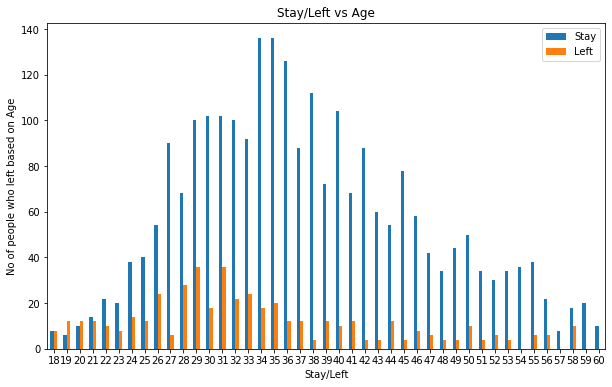

In [ ]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['Age'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Stay/Left vs Age")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Age")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

**How Gender is affecting Attrition**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

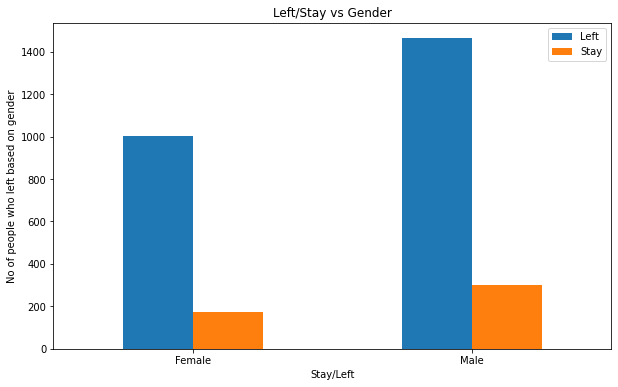

In [ ]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['Gender'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Left/Stay vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on gender")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

**How Education is affecting Attrition**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3, 4, 5]), <a list of 6 Text major ticklabel objects>)

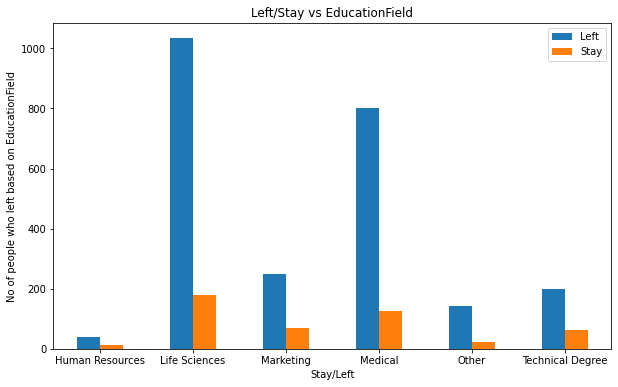

In [ ]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['EducationField'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Left/Stay vs EducationField")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on EducationField")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

**How StockOptionLevel is affecting Attrition**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

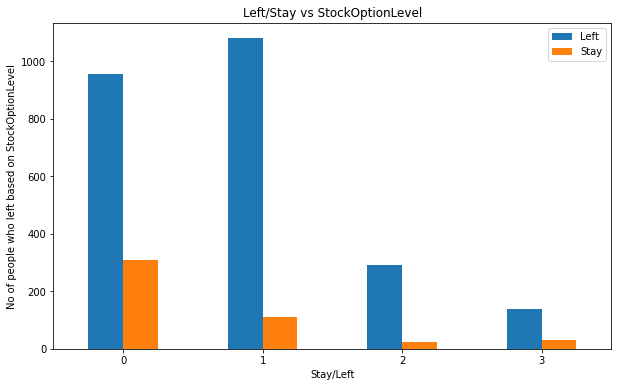

In [ ]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['StockOptionLevel'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Left/Stay vs StockOptionLevel")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on StockOptionLevel")
plt.legend(["Left","Stay"])
plt.xticks(rotation=0)

**How DistanceFromHome is affecting Attrition**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28]),
 <a list of 29 Text major ticklabel objects>)

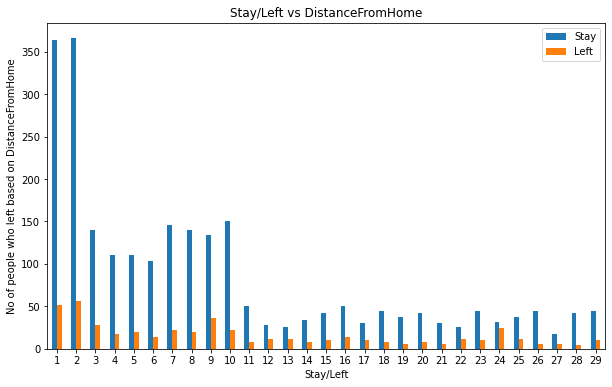

In [ ]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['DistanceFromHome'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Stay/Left vs DistanceFromHome")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on DistanceFromHome")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

**How MaritalStatus affecting Attrition** 

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

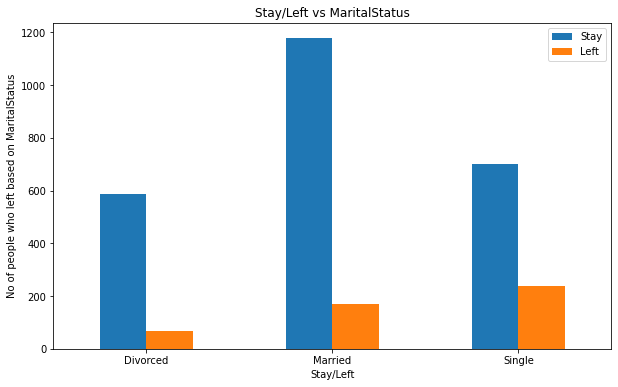

In [74]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['MaritalStatus'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Stay/Left vs MaritalStatus")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on MaritalStatus")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

**How Bussiness Travel affecting Attrition Rate**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2]), <a list of 3 Text major ticklabel objects>)

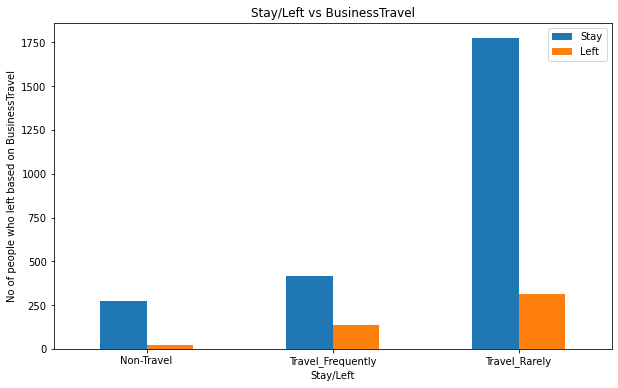

In [76]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['BusinessTravel'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Stay/Left vs BusinessTravel")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on BusinessTravel")
plt.legend(["Stay", "Left"])
plt.xticks(rotation=0)

**How EnvironmentSatisfaction affecting Attrition**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

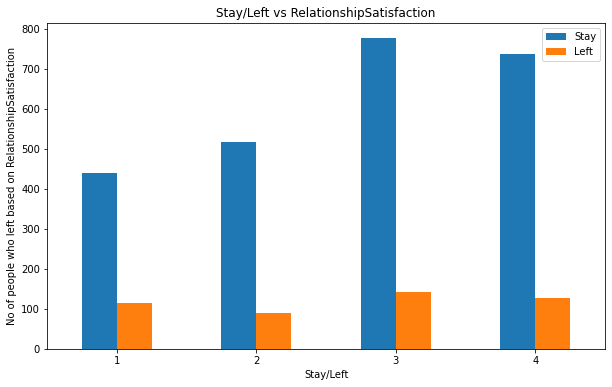

In [ ]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['RelationshipSatisfaction'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Stay/Left vs RelationshipSatisfaction")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on RelationshipSatisfaction")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

**How Gender is affecting Attrition**

AxesSubplot(0.125,0.125;0.775x0.755)


(array([0, 1]), <a list of 2 Text major ticklabel objects>)

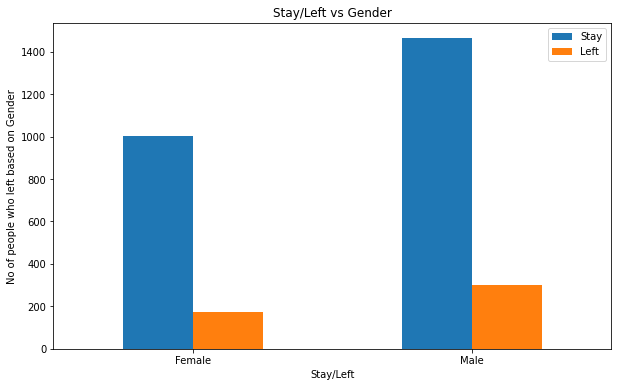

In [ ]:
#Create a plot for crosstab
k = pd.crosstab(employee_data['Gender'],employee_data['Attrition']).plot(kind="bar",figsize=(10,6))
print(k)
plt.title("Stay/Left vs Gender")
plt.xlabel("Stay/Left")
plt.ylabel("No of people who left based on Gender")
plt.legend(["Stay","Left"])
plt.xticks(rotation=0)

**Correlation Check**

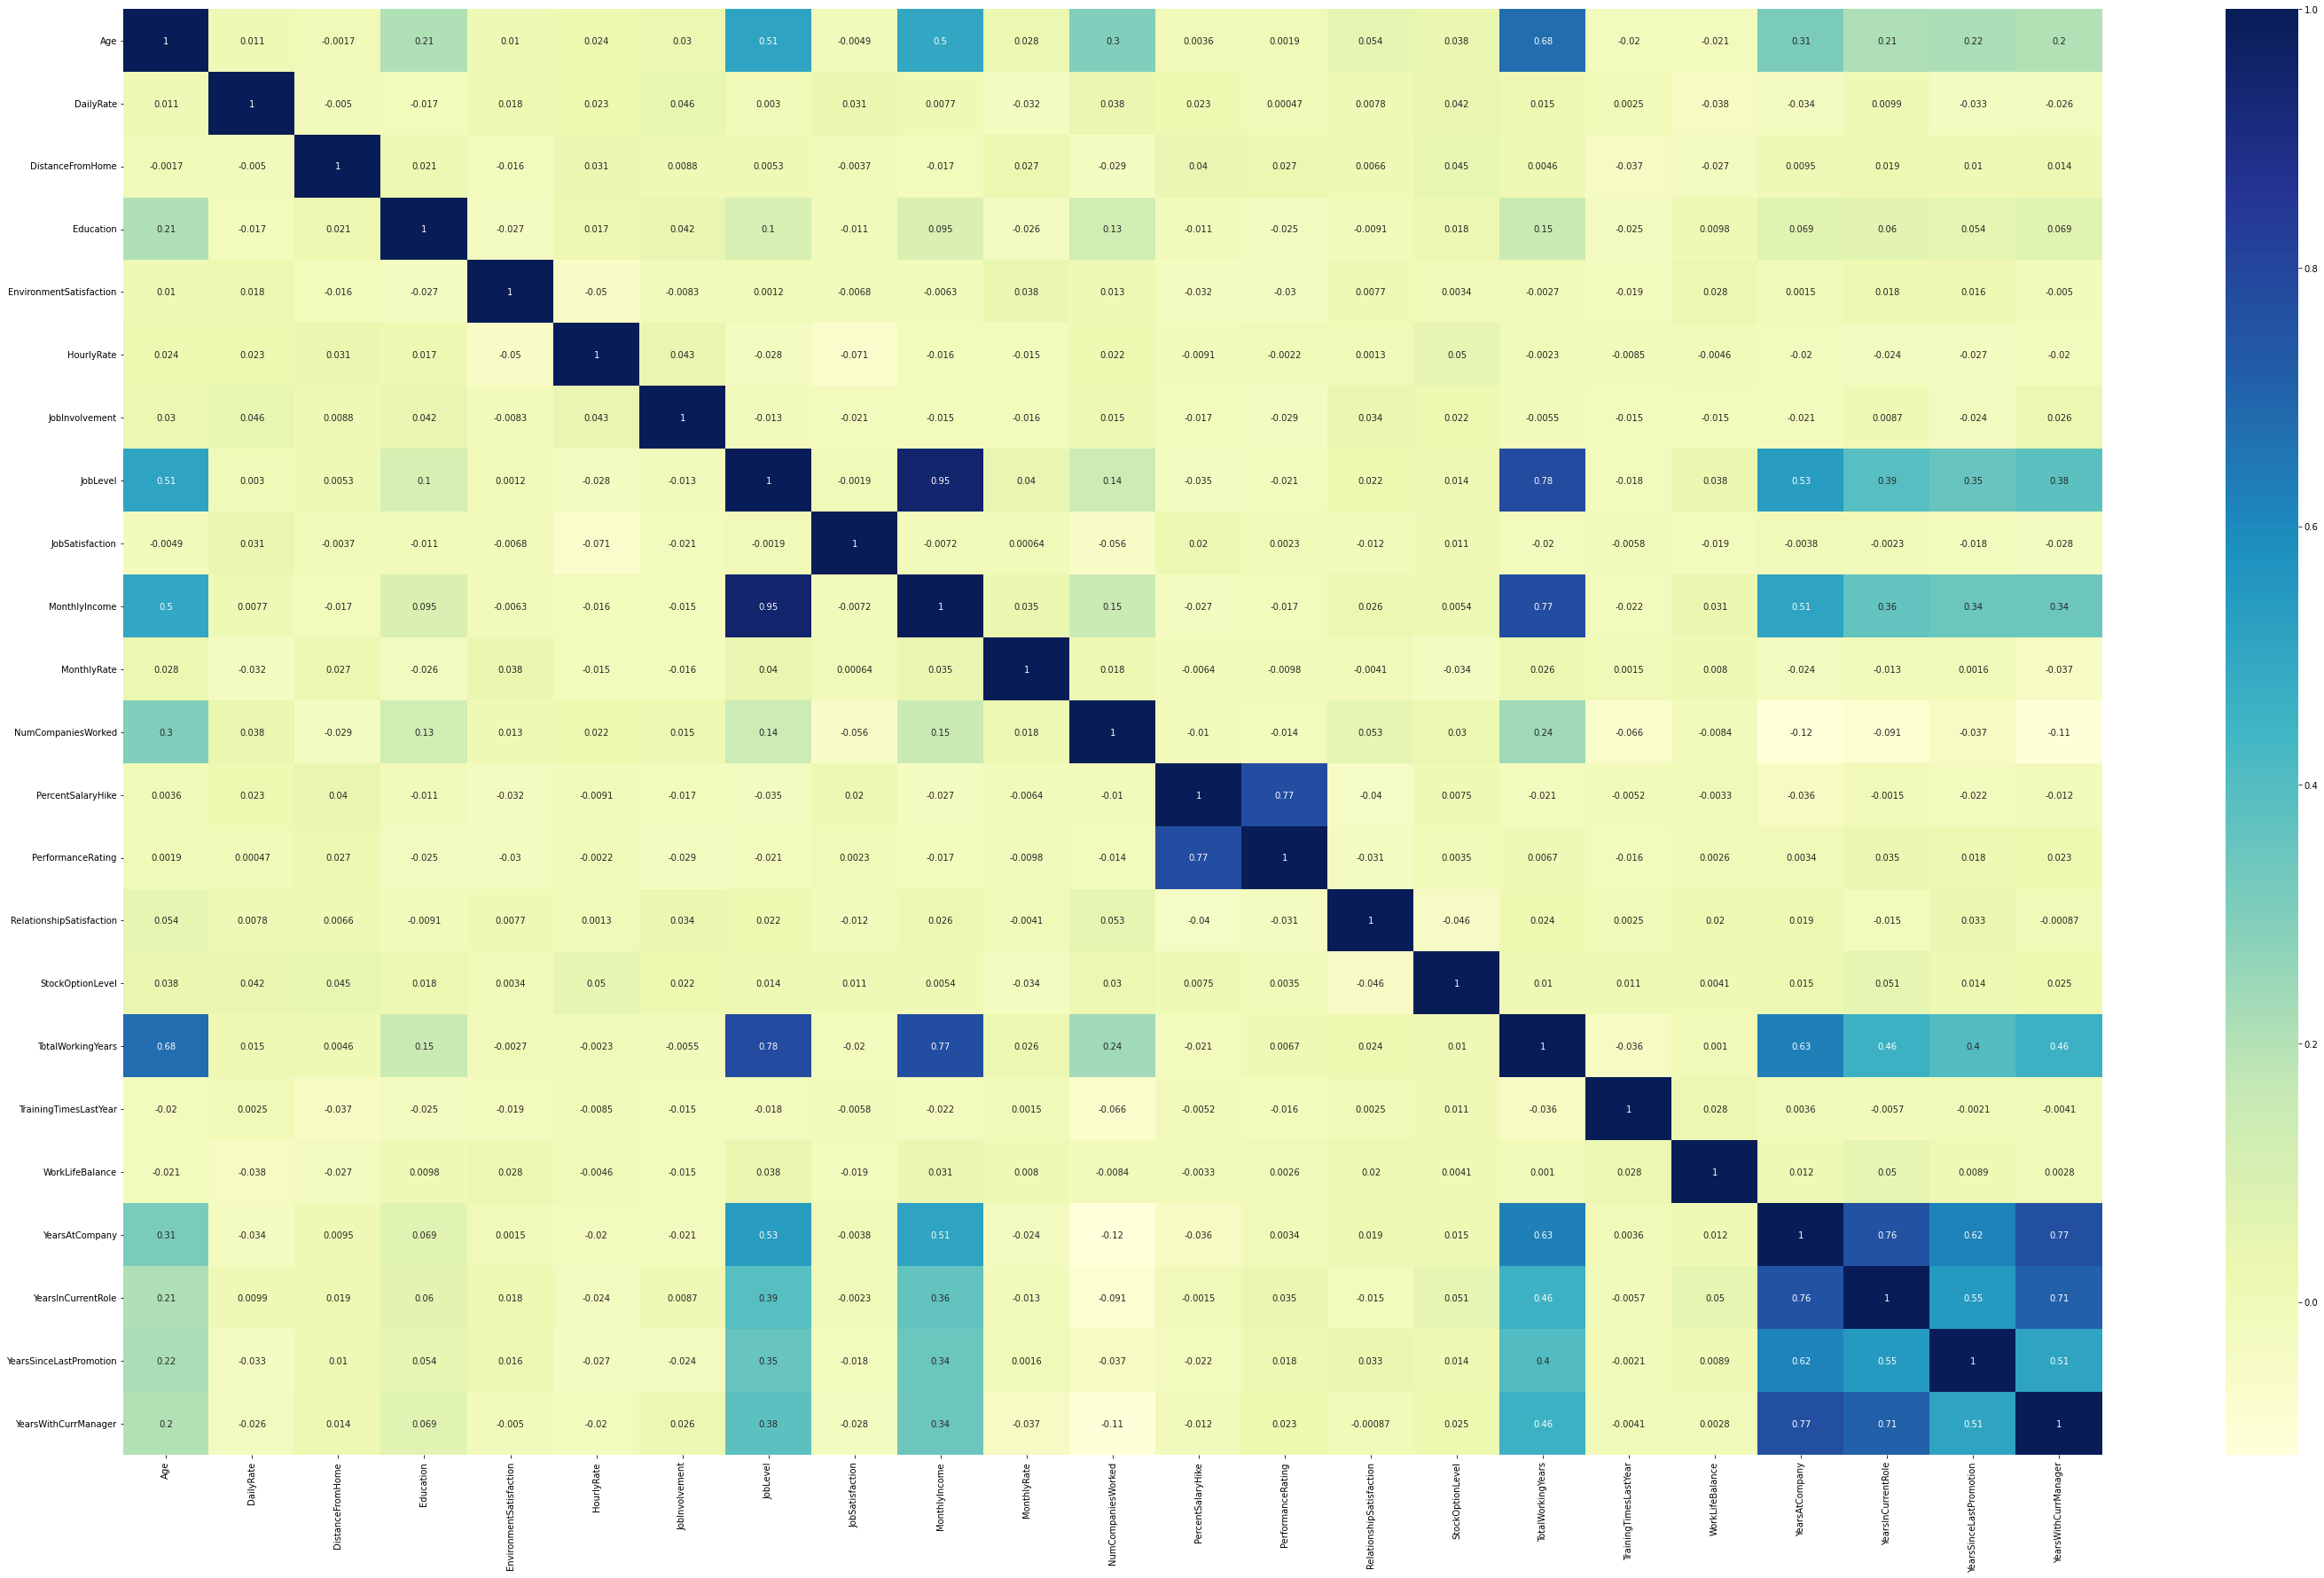

In [ ]:
f, ax = plt.subplots(figsize=(50, 30))
#ax = sns.heatmap(employee_data_new.corr(), annot=True, cmap="YlGnBu")
#Dropping Employee Count , Standard Hours, Employee Number as correlation is null
employee_data.drop(columns =['EmployeeCount', 'EmployeeNumber', 'StandardHours'], inplace=True)
ax = sns.heatmap(employee_data.corr(), annot=True, cmap="YlGnBu")

**Dropping highly Correlated columns** 

In [ ]:
#Getting Pairs which are uncorrelated i.e corre_coeff > 0.75
import timeit
def correlated_func(corrmat, employee_data):
    l = set()
    columns_to_drop=[]
    #Iterating through each row which is a tuple of index and columns
    for row in corrmat.itertuples():
          position = 0
          #Iterating through each row which is a tuple of index and columns
          for corr in corrmat.loc[row.Index].values:
              if ((corr > 0.75 or corr < -0.75) and corr !=1) and (row.Index, corrmat.columns[position]) not in l:
                  l.add((corrmat.columns[position], row.Index))
              position +=1

    
    for i in l:
      columns_to_drop.append(i[0])

    
    employee_data.drop(columns = columns_to_drop, inplace=True)


    return employee_data

timeit.timeit()

0.037055151000004116

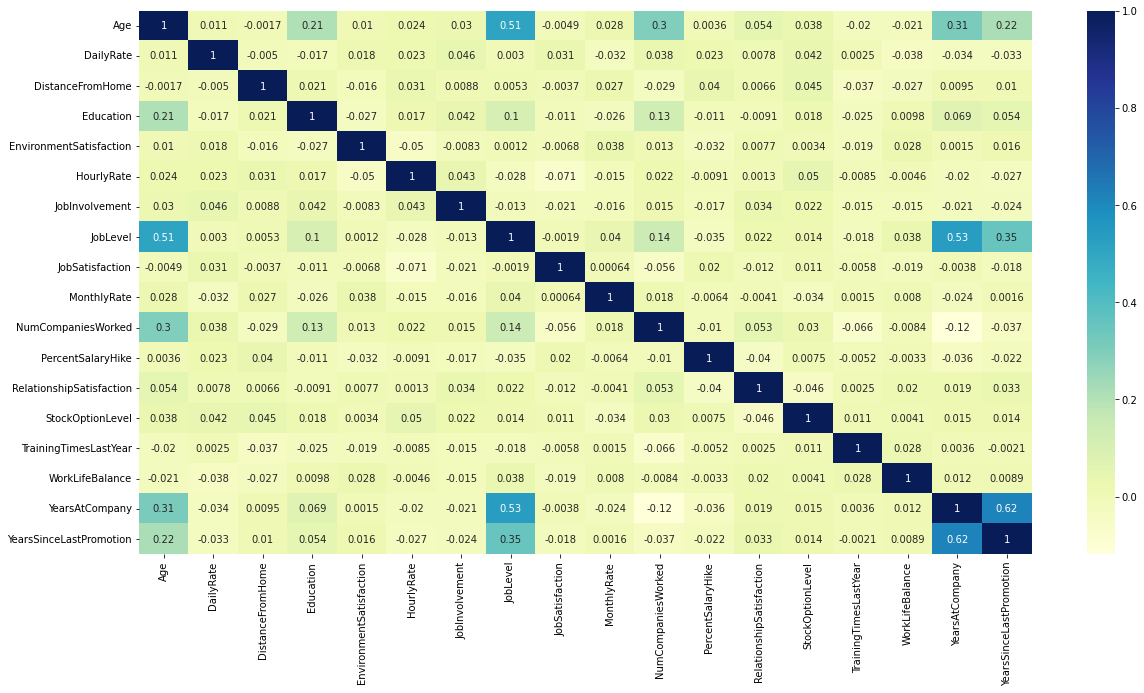

In [ ]:
employee_data = correlated_func(employee_data.corr(), employee_data)
f, ax = plt.subplots(figsize=(20, 10))
ax = sns.heatmap(employee_data.corr(), annot=True, cmap="YlGnBu")

**Outlier Removal Using z-score**

In [ ]:
#Outlier Check
from scipy import stats
import numpy as np
#Taking only quantitative features
employee_data_new = employee_data.select_dtypes(exclude='object')
z = np.abs(stats.zscore(employee_data_new))
threshold = 3
print("Before removal of outlier")
employee_data_new.info()

#Taking all features
employee_data_new = employee_data[(z < threshold).all(axis=1)]
print("Outlier Count")
print(z[z>threshold].size)
print("After removal of outlier")
employee_data_new.info()

Before removal of outlier
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2940 entries, 0 to 2939
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype
---  ------                    --------------  -----
 0   Age                       2940 non-null   int64
 1   DailyRate                 2940 non-null   int64
 2   DistanceFromHome          2940 non-null   int64
 3   Education                 2940 non-null   int64
 4   EnvironmentSatisfaction   2940 non-null   int64
 5   HourlyRate                2940 non-null   int64
 6   JobInvolvement            2940 non-null   int64
 7   JobLevel                  2940 non-null   int64
 8   JobSatisfaction           2940 non-null   int64
 9   MonthlyRate               2940 non-null   int64
 10  NumCompaniesWorked        2940 non-null   int64
 11  PercentSalaryHike         2940 non-null   int64
 12  RelationshipSatisfaction  2940 non-null   int64
 13  StockOptionLevel          2940 non-null   int64
 14  TrainingTimesL

**Binning or Aggregating**

In [ ]:
#Fixed Binning
#sns.histplot(employee_data_new['Age'])
#f, ax = plt.subplots(figsize=(30,20))
#sns.countplot(employee_data_new['Age'])
def binning_func(col, cut_points, labels=None):
   min_val = col.min()
   max_val = col.max()

   break_points = [min_val] + cut_points + [max_val]

   if not labels :
     labels = range(len(cut_points) + 1)
   colbins = pd.cut(col, bins = break_points, labels = labels, include_lowest = True)
   return colbins


cut_points = [25, employee_data_new['Age'].median(), 45]
labels = ['Young', 'Middle-Aged', 'Senior', 'Super Senior']
employee_data_new['Age_Category'] = binning_func(employee_data_new['Age'], cut_points, labels)
employee_data_new.drop(columns=['Age', 'Over18'], inplace=True)
employee_data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2939
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 2826 non-null   object  
 1   BusinessTravel            2826 non-null   object  
 2   DailyRate                 2826 non-null   int64   
 3   Department                2826 non-null   object  
 4   DistanceFromHome          2826 non-null   int64   
 5   Education                 2826 non-null   int64   
 6   EducationField            2826 non-null   object  
 7   EnvironmentSatisfaction   2826 non-null   int64   
 8   Gender                    2826 non-null   object  
 9   HourlyRate                2826 non-null   int64   
 10  JobInvolvement            2826 non-null   int64   
 11  JobLevel                  2826 non-null   int64   
 12  JobRole                   2826 non-null   object  
 13  JobSatisfaction           2826 non-null   int64 

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
/usr/local/lib/python3.7/dist-packages/pandas/core/frame.py:4913: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2939
Data columns (total 26 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   Attrition                 2826 non-null   object  
 1   BusinessTravel            2826 non-null   object  
 2   DailyRate                 2826 non-null   int64   
 3   Department                2826 non-null   object  
 4   DistanceFromHome          2826 non-null   int64   
 5   Education                 2826 non-null   int64   
 6   EducationField            2826 non-null   object  
 7   EnvironmentSatisfaction   2826 non-null   int64   
 8   Gender                    2826 non-null   object  
 9   HourlyRate                2826 non-null   int64   
 10  JobInvolvement            2826 non-null   int64   
 11  JobLevel                  2826 non-null   int64   
 12  JobRole                   2826 non-null   object  
 13  JobSatisfaction           2826 non-null   int64 

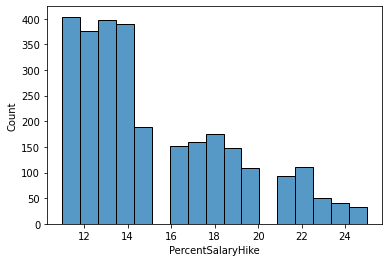

In [ ]:
sns.histplot(employee_data_new['PercentSalaryHike'])
cut_points = [employee_data_new['PercentSalaryHike'].median(), 20]
labels = ['Not_Satisfactory_Hike', 'Decent_Hike', 'Pretty Decent_Hike']
employee_data_new['%Hike Category'] = binning_func(employee_data_new['PercentSalaryHike'], cut_points, labels)
employee_data_new.drop(columns=['PercentSalaryHike'], inplace=True)

employee_data_new.info()

**Check for Qualitative Features**

In [ ]:
qual_columns = employee_data_new.select_dtypes(exclude='int64').columns
qual_columns

Index(['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender',
       'JobRole', 'MaritalStatus', 'OverTime', 'Age_Category',
       '%Hike Category'],
      dtype='object')

**Checking for the labels in the categorical parameters**

In [ ]:
print("Attrition Labels:")
print(employee_data_new['Attrition'].unique())
print("Bussiness Travel Labels:")
print(employee_data_new['BusinessTravel'].unique())
print("Department Labels:")
print(employee_data_new['Department'].unique())
print("Gender Labels:")
print(employee_data_new['Gender'].unique())
print("JobRole Labels:")
print(employee_data_new['JobRole'].unique())
print("MaritalStatus Labels:")
print(employee_data_new['MaritalStatus'].unique())
print("Age Category")
print(employee_data_new['Age_Category'].unique())
print("Hike Labels:")
print(employee_data_new['%Hike Category'].unique())

Attrition Labels:
['Yes' 'No']
Bussiness Travel Labels:
['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Department Labels:
['Sales' 'Research & Development' 'Human Resources']
Gender Labels:
['Female' 'Male']
JobRole Labels:
['Sales Executive' 'Research Scientist' 'Laboratory Technician'
 'Manufacturing Director' 'Healthcare Representative' 'Manager'
 'Sales Representative' 'Research Director' 'Human Resources']
MaritalStatus Labels:
['Single' 'Married' 'Divorced']
Age Category
['Senior', 'Super Senior', 'Middle-Aged', 'Young']
Categories (4, object): ['Young' < 'Middle-Aged' < 'Senior' < 'Super Senior']
Hike Labels:
['Not_Satisfactory_Hike', 'Pretty Decent_Hike', 'Decent_Hike']
Categories (3, object): ['Not_Satisfactory_Hike' < 'Decent_Hike' < 'Pretty Decent_Hike']


**Encoding Qualitative Variables**

In [ ]:
#Using Lable encoder for encoding (only oridnal categorical values)
def preprocessor(df):
    res_df = df.copy()
    # Using Label Encoder for ordinal data
    le = preprocessing.LabelEncoder()
    qual_columns = ['%Hike Category', 'Gender', 'Attrition']
    encoded_df = pd.DataFrame(res_df[qual_columns].apply(lambda col : le.fit_transform(col)))
    res_df.drop(columns=qual_columns, inplace=True)

    # Using One-hot encoding
    qual_columns = ['BusinessTravel' , 'Department', 'JobRole', 'MaritalStatus','Age_Category', 'OverTime']
    encoded_df2 = pd.get_dummies(res_df[qual_columns], drop_first=True)
    #Concatenating dataframes after encoding 
    res_df.drop(columns=qual_columns, inplace=True)
    res_df = pd.concat((res_df, encoded_df, encoded_df2), axis=1)
    return res_df


encoded_employee_data = preprocessor(employee_data_new)
encoded_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2939
Data columns (total 38 columns):
 #   Column                             Non-Null Count  Dtype 
---  ------                             --------------  ----- 
 0   DailyRate                          2826 non-null   int64 
 1   DistanceFromHome                   2826 non-null   int64 
 2   Education                          2826 non-null   int64 
 3   EducationField                     2826 non-null   object
 4   EnvironmentSatisfaction            2826 non-null   int64 
 5   HourlyRate                         2826 non-null   int64 
 6   JobInvolvement                     2826 non-null   int64 
 7   JobLevel                           2826 non-null   int64 
 8   JobSatisfaction                    2826 non-null   int64 
 9   MonthlyRate                        2826 non-null   int64 
 10  NumCompaniesWorked                 2826 non-null   int64 
 11  RelationshipSatisfaction           2826 non-null   int64 
 12  StockO

**Correlation Check**

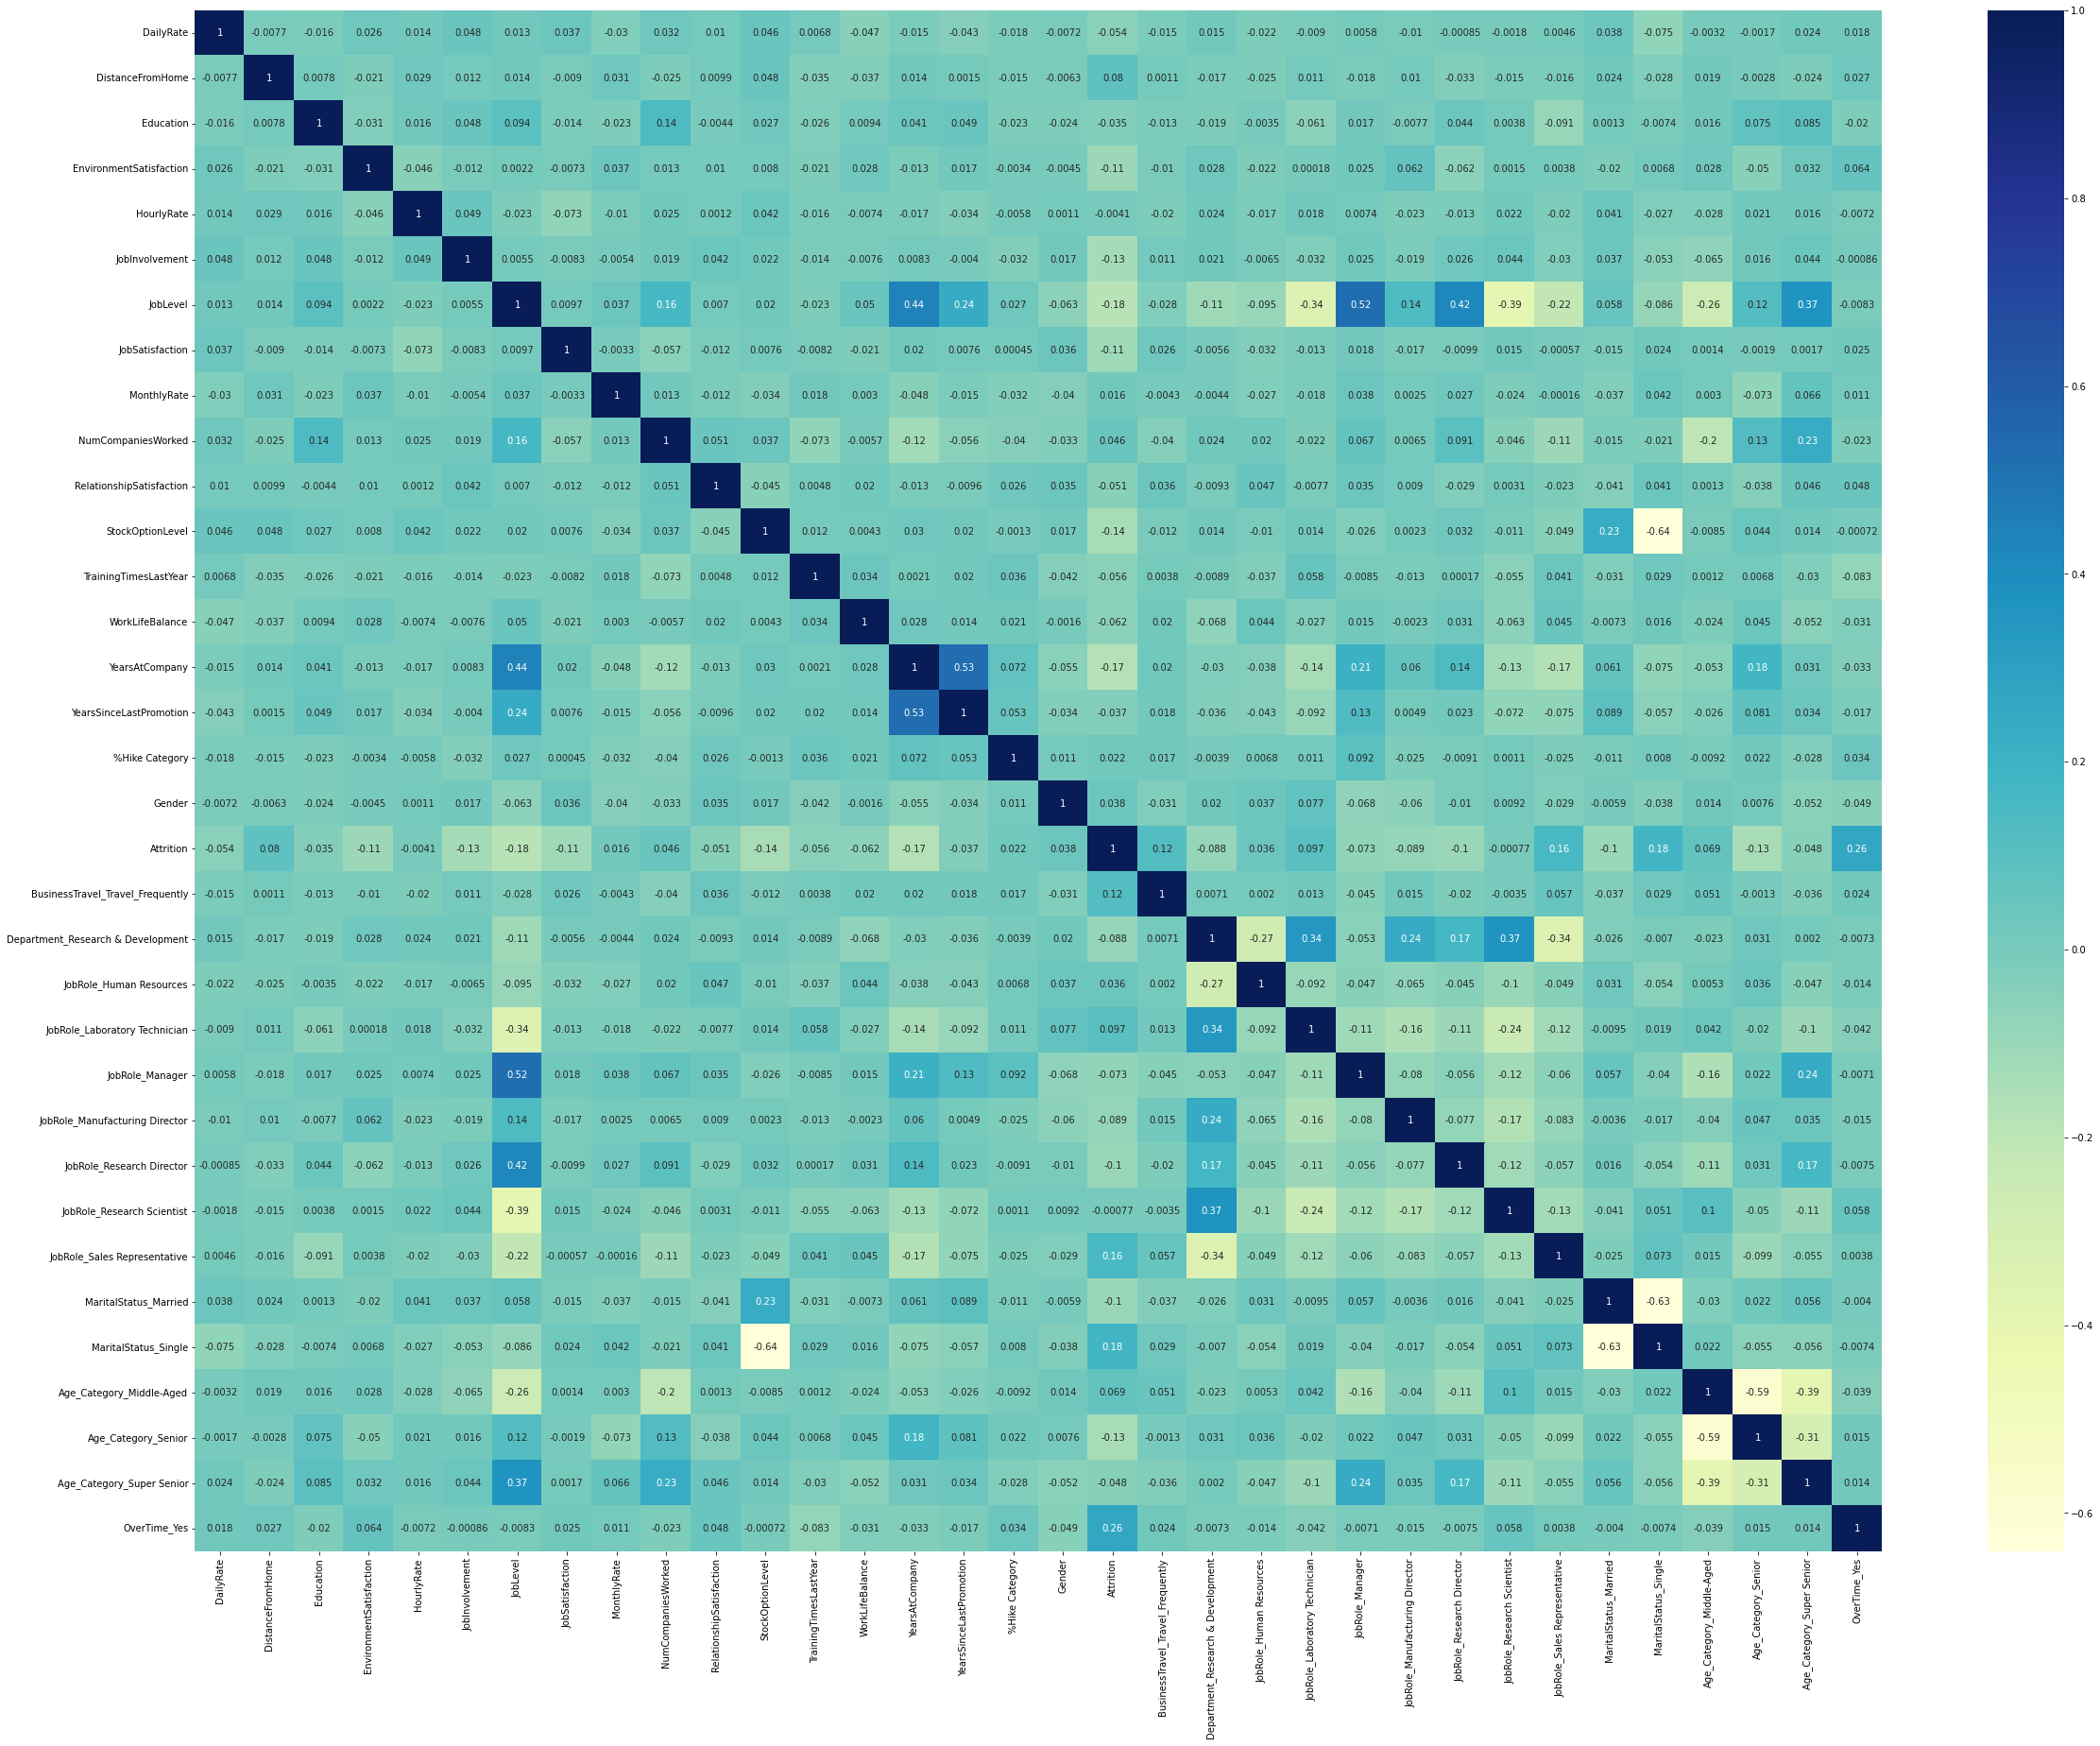

In [ ]:
f, ax = plt.subplots(figsize=(40, 30))
encoded_employee_data = correlated_func(encoded_employee_data.corr(), encoded_employee_data)
ax = sns.heatmap(encoded_employee_data.corr(), annot=True, cmap="YlGnBu")

**Dropping less important features**

In [ ]:
#'Education', 'EducationField', 'DailyRate', 'TrainingTimesLastYear', 'HourlyRate', 'MonthlyRate', 'StockOptionLevel'
#As per correlation factors above fields are less important features affecting employee attrition rate so dropping these factors
encoded_employee_data.drop(columns = ['Education', 'EducationField', 'DailyRate', 'TrainingTimesLastYear', 'HourlyRate', 'MonthlyRate', 'StockOptionLevel'] , inplace=True)
encoded_employee_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2826 entries, 0 to 2939
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   DistanceFromHome                   2826 non-null   int64
 1   EnvironmentSatisfaction            2826 non-null   int64
 2   JobInvolvement                     2826 non-null   int64
 3   JobLevel                           2826 non-null   int64
 4   JobSatisfaction                    2826 non-null   int64
 5   NumCompaniesWorked                 2826 non-null   int64
 6   RelationshipSatisfaction           2826 non-null   int64
 7   WorkLifeBalance                    2826 non-null   int64
 8   YearsAtCompany                     2826 non-null   int64
 9   YearsSinceLastPromotion            2826 non-null   int64
 10  %Hike Category                     2826 non-null   int64
 11  Gender                             2826 non-null   int64
 12  Attrition           

**Checking for the label counts in the target varable**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


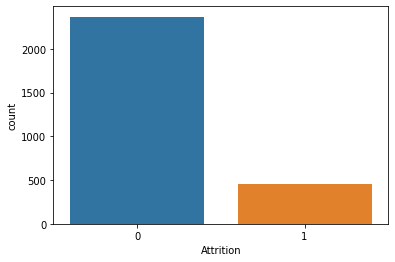

In [ ]:
encoded_employee_data['Attrition'].value_counts()
# As Target Data is imbalanced
sns.countplot(encoded_employee_data['Attrition'])

**Handling Imbalanced Data**

In [ ]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(sampling_strategy='minority', random_state=42)
# Fit the model to generate the data.
oversampled_X, oversampled_Y = sm.fit_resample(encoded_employee_data.drop('Attrition', axis=1), encoded_employee_data['Attrition'])
oversampled = pd.concat([pd.DataFrame(oversampled_Y), pd.DataFrame(oversampled_X)], axis=1)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


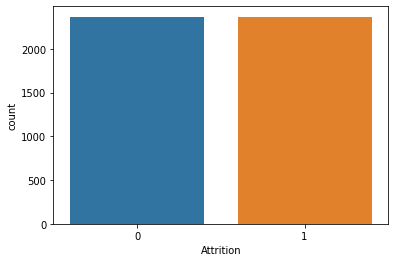

In [ ]:
sns.countplot(oversampled['Attrition'])

In [ ]:
z = np.abs(stats.zscore(oversampled))
threshold = 3
print("Before removal of outlier")
oversampled.info()
oversampled = oversampled[(z < threshold).all(axis=1)]
print("Outlier Count")
print(z[z>threshold].size)
print("After removal of outlier")
oversampled.info()

Before removal of outlier
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4736 entries, 0 to 4735
Data columns (total 28 columns):
 #   Column                             Non-Null Count  Dtype
---  ------                             --------------  -----
 0   Attrition                          4736 non-null   int64
 1   DistanceFromHome                   4736 non-null   int64
 2   EnvironmentSatisfaction            4736 non-null   int64
 3   JobInvolvement                     4736 non-null   int64
 4   JobLevel                           4736 non-null   int64
 5   JobSatisfaction                    4736 non-null   int64
 6   NumCompaniesWorked                 4736 non-null   int64
 7   RelationshipSatisfaction           4736 non-null   int64
 8   WorkLifeBalance                    4736 non-null   int64
 9   YearsAtCompany                     4736 non-null   int64
 10  YearsSinceLastPromotion            4736 non-null   int64
 11  %Hike Category                     4736 non-null   int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


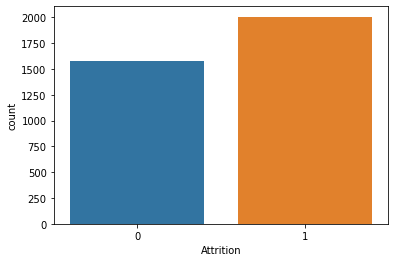

In [ ]:
oversampled['Attrition'].value_counts()
sns.countplot(oversampled['Attrition'])

**Splitting Dataset into Train and Test**

In [ ]:
x = oversampled.drop(['Attrition'], axis=1)
y = oversampled['Attrition']
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size = 0.3)

print('Shape of training feature:', x_train.shape)
print('Shape of testing feature:', x_test.shape)
print('Shape of training label:', y_train.shape)
print('Shape of testing label:', y_test.shape)

Shape of training feature: (2508, 27)
Shape of testing feature: (1075, 27)
Shape of training label: (2508,)
Shape of testing label: (1075,)


**Building Classification Model**

**1st Model - Decision Tree**

In [ ]:
model_dt = DecisionTreeClassifier(random_state=1, max_depth=2)
model_dt.fit(x_train, y_train)
model_dt_score_train = model_dt.score(x_train, y_train)
print("Training score: ",model_dt_score_train)
model_dt_score_test = model_dt.score(x_test, y_test)
print("Testing score: ",model_dt_score_test)

Training score:  0.6634768740031898
Testing score:  0.6567441860465116


**Performance Matrice**

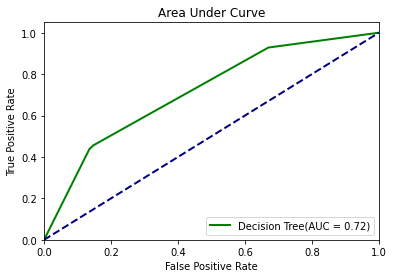

In [ ]:
y_pred_dt = model_dt.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

In [ ]:
predictions = model_dt.predict(x_test)
confusion_matrix(y_test, predictions)

array([[161, 327],
       [ 42, 545]])

**Classification Report**

In [ ]:
cl_rep = classification_report(y_test, predictions)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.79      0.33      0.47       488
           1       0.62      0.93      0.75       587

    accuracy                           0.66      1075
   macro avg       0.71      0.63      0.61      1075
weighted avg       0.70      0.66      0.62      1075



**Hyperparameter Tuning for Decision Tree Classifier**

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {'criterion':['gini'] , 'max_depth': np.arange(6,10), 'min_samples_split' : np.arange(20,40)}
grid_clf_acc = GridSearchCV(DecisionTreeClassifier(random_state=1), param_grid, cv=10)
grid_clf = grid_clf_acc.fit(x_train, y_train)
print(grid_clf_acc.best_params_)
model_dt_2_score_train = grid_clf.score(x_train, y_train)
print("Training score: ",model_dt_2_score_train)
model_dt_2_score_test = grid_clf.score(x_test, y_test)
print("Testing score: ",model_dt_2_score_test)

{'criterion': 'gini', 'max_depth': 9, 'min_samples_split': 20}
Training score:  0.9043062200956937
Testing score:  0.8567441860465116


In [ ]:
predictions = grid_clf.predict(x_test)
confusion_matrix(y_test, predictions)
cl_rep = classification_report(y_test, predictions)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.86      0.82      0.84       488
           1       0.85      0.89      0.87       587

    accuracy                           0.86      1075
   macro avg       0.86      0.85      0.85      1075
weighted avg       0.86      0.86      0.86      1075



**Visualise Decision Tree**

In [ ]:
import graphviz
fig = plt.figure(figsize=(25,20))
from sklearn import tree
# DOT data
dot_data = tree.export_graphviz(grid_clf.best_estimator_, out_file=None,
                                feature_names = oversampled.columns[1:],
                                class_names=oversampled.columns[1],
                                filled=True)

#Draw graph
graph = graphviz.Source(dot_data, format="png") 
graph
graph.render("decision_tree_graphivz")

'decision_tree_graphivz.png'

<Figure size 1800x1440 with 0 Axes>

**2nd Model : K Nearest Neighbour**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import metrics


# calculating the accuracy of models with different values of k
mean_acc = np.zeros(20)
for i in range(1,21):
    #Train Model and Predict  
    knn = KNeighborsClassifier(n_neighbors = i).fit(x_train,y_train)
    yhat= knn.predict(x_test)
    mean_acc[i-1] = metrics.accuracy_score(y_test, yhat)

mean_acc

array([0.95162791, 0.96      , 0.87813953, 0.89767442, 0.86418605,
       0.87627907, 0.85581395, 0.86325581, 0.84465116, 0.84      ,
       0.81953488, 0.82232558, 0.81209302, 0.82139535, 0.81023256,
       0.81302326, 0.79534884, 0.8027907 , 0.77860465, 0.78418605])

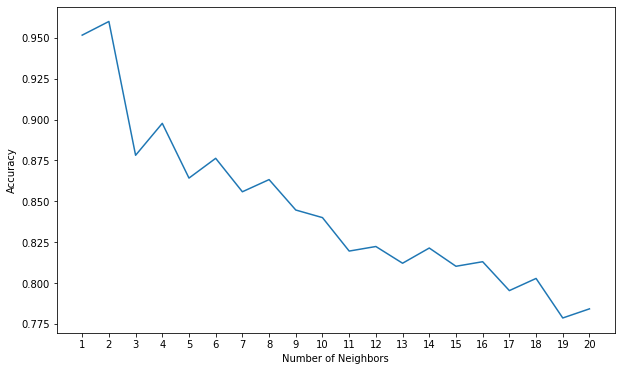

In [ ]:
loc = np.arange(1,21,step=1.0)
plt.figure(figsize = (10, 6))
plt.plot(range(1,21), mean_acc)
plt.xticks(loc)
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

#Accuracy is more between K = 1 to 5

**Hyperparameter Tuning**

In [ ]:
grid_params = {'n_neighbors' : [1,2,3,4,5,6,7,8],
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, verbose = 1, cv=3, n_jobs = -1)

g_res = gs.fit(x_train, y_train)
g_res.best_score_
g_res.best_params_

Fitting 3 folds for each of 48 candidates, totalling 144 fits


{'metric': 'manhattan', 'n_neighbors': 2, 'weights': 'uniform'}

**Building Final KNN Model**

In [ ]:
# use the best hyperparameters
{'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
knn = KNeighborsClassifier(n_neighbors = 2, weights = 'uniform', algorithm = 'brute',metric = 'minkowski')
knn_model = knn.fit(x_train, y_train)
# get a prediction
y_hat = knn_model.predict(x_train)
y_knn = knn_model.predict(x_test)

**Model Evaluation**

In [ ]:
print('Training set accuracy: ', metrics.accuracy_score(y_train, y_hat))
print('Test set accuracy: ',metrics.accuracy_score(y_test, y_knn))

Training set accuracy:  1.0
Test set accuracy:  0.96


**Performance Matrice**

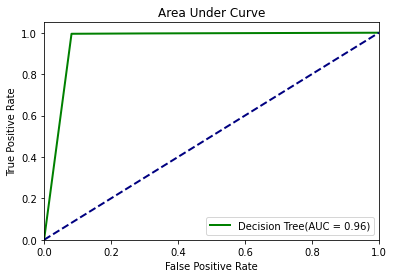

In [79]:
y_pred_dt = knn_model.predict_proba(x_test)[:, 1]
fpr_dt, tpr_dt, _ = roc_curve(y_test, y_pred_dt)
roc_auc_dt = auc(fpr_dt, tpr_dt)
plt.figure(1)
lw = 2
plt.plot(fpr_dt, tpr_dt, color='green',
         lw=lw, label='Decision Tree(AUC = %0.2f)' % roc_auc_dt)
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')

plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Area Under Curve')
plt.legend(loc="lower right")
plt.show()

**Confusion Matrix**

              precision    recall  f1-score   support

           0       0.99      0.92      0.95       488
           1       0.94      0.99      0.96       587

    accuracy                           0.96      1075
   macro avg       0.96      0.96      0.96      1075
weighted avg       0.96      0.96      0.96      1075



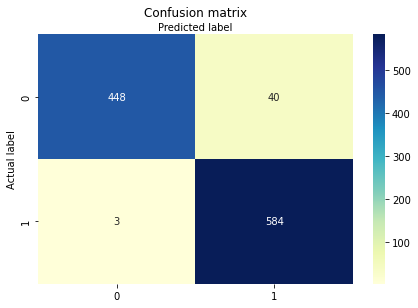

In [78]:
from sklearn.metrics import confusion_matrix
cnf_matrix = confusion_matrix(y_test, y_knn)

class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

from sklearn.metrics import classification_report
print(classification_report(y_test, y_knn))

**Cross Validation Score**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn_model, x, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Model accuracy:  0.9963718317321553


**3rd Model : Naive Byes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB
gaussian_nb_model = GaussianNB().fit(x_train, y_train)

classifier_score_train = gaussian_nb_model.score(x_train, y_train) 
print("Training score: ",classifier_score_train)
classifier_score_test = gaussian_nb_model.score(x_test, y_test)
print("Testing score: ",classifier_score_test)

Training score:  0.7834928229665071
Testing score:  0.7786046511627907


**Hyperparameter Tuning for Naive Byes Classifier**

In [ ]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)
from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

gs_NB = GridSearchCV(estimator=gaussian_nb_model, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(x_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


/usr/local/lib/python3.7/dist-packages/sklearn/preprocessing/_data.py:3253: RuntimeWarning: divide by zero encountered in log
  loglike = -n_samples / 2 * np.log(x_trans.var())


In [ ]:
gs_NB.best_params_

{'var_smoothing': 0.01}

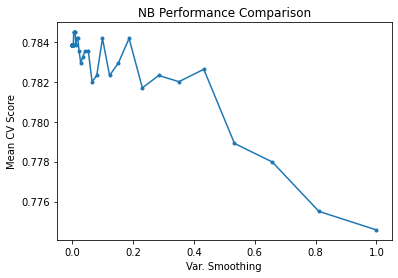

In [ ]:
gs_NB.best_score_
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [ ]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.7897674418604651


**Cross Val Score**

In [ ]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(gs_NB, x, y, cv =5)
print('Model accuracy: ',np.mean(scores))

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Model accuracy:  0.7823239288469181


**4th Model: Logistic Regression**

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
classifier_LR = LogisticRegression(random_state=0)
classifier_LR.fit(x_train, y_train)
y_pred = classifier_LR.predict(x_test)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


**Performance Matric**

In [ ]:
cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.80      0.83      0.82       488
           1       0.86      0.83      0.84       587

    accuracy                           0.83      1075
   macro avg       0.83      0.83      0.83      1075
weighted avg       0.83      0.83      0.83      1075



**Hyperparameter Tuning**

In [64]:
from sklearn.model_selection import RandomizedSearchCV
grid_values = {'penalty': ['l1', 'l2'], 'C': [0.01, 0.1, 1, 10, 100], 'solver' : ['liblinear']}

clf = GridSearchCV(LogisticRegression(), param_grid = grid_values, cv = 3, verbose=True, n_jobs=-1)
best_clf = clf.fit(x_train,y_train)
print(best_clf.best_params_)

Fitting 3 folds for each of 10 candidates, totalling 30 fits
{'C': 1, 'penalty': 'l2', 'solver': 'liblinear'}


**Final Logistics Regression Model**

In [65]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=0, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)
classifier.fit(x_train, y_train)
y_pred = classifier.predict(x_test)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,y_pred)
print('accuracy_score on test dataset : ', accuracy_test)

accuracy_score on test dataset :  0.8306976744186046


**Performance Matrice**

In [66]:
cl_rep = classification_report(y_test, y_pred)
print(cl_rep)

              precision    recall  f1-score   support

           0       0.80      0.84      0.82       488
           1       0.86      0.83      0.84       587

    accuracy                           0.83      1075
   macro avg       0.83      0.83      0.83      1075
weighted avg       0.83      0.83      0.83      1075



**Comparing Model Accuracy** 

In [67]:
from sklearn import model_selection
models = []
models.append(('GNB', gs_NB))
models.append(('CART', grid_clf))
models.append(('KNN', knn_model))
models.append(('LR', classifier))

results = []
names = []
scoring = 'accuracy'
for name, model in models:
  kfold = model_selection.KFold(n_splits=10, random_state=None)
  cv_results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
  results.append(cv_results)
  names.append(name)
  msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
  print(msg)

Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
Fitting 15 folds for each of 100 candidates, totalling 1500 fits
GNB: 0.787085 (0.020829)
CART: 0.858443 (0.022125)
KNN: 0.958537 (0.013109)
LR: 0.840900 (0.019384)


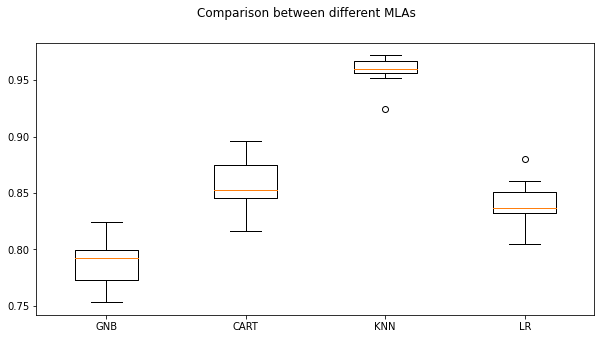

In [68]:
# boxplot algorithm comparison
fig = plt.figure(figsize = (10, 5))
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

**Final Predictions Using KNN**

In [73]:
predicted_values = knn_model.predict(x_test)

array([1, 0, 1, ..., 0, 1, 0])